<a href="https://colab.research.google.com/github/MpRonald/Machine-Learning/blob/main/Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anomaly Detection from Time Series

In [2]:
!pip install ruptures -q alibi_detect

     |████████████████████████████████| 6.6 MB 5.1 MB/s 
     |████████████████████████████████| 77 kB 3.7 MB/s 


In [3]:
# Let's load the time-series of computer network intrusions (KDD99):

from alibi_detect.datasets import fetch_kdd
intrusions = fetch_kdd()

intrusions is a dictionary, where the data key returns a matrix of 494021x18. The 18 dimensions of the time-series are the continuous features of the dataset, mostly error rates and counts:

In [4]:
intrusions

{'data': array([[8, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        [8, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        [8, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        ...,
        [18, 0.17, 0.11, ..., 0.01, 0.0, 0.0],
        [12, 0.0, 0.0, ..., 0.01, 0.0, 0.0],
        [35, 0.0, 0.0, ..., 0.01, 0.0, 0.0]], dtype=object),
 'feature_names': ['srv_count',
  'serror_rate',
  'srv_serror_rate',
  'rerror_rate',
  'srv_rerror_rate',
  'same_srv_rate',
  'diff_srv_rate',
  'srv_diff_host_rate',
  'dst_host_count',
  'dst_host_srv_count',
  'dst_host_same_srv_rate',
  'dst_host_diff_srv_rate',
  'dst_host_same_src_port_rate',
  'dst_host_srv_diff_host_rate',
  'dst_host_serror_rate',
  'dst_host_srv_serror_rate',
  'dst_host_rerror_rate',
  'dst_host_srv_rerror_rate'],
 'target': array([0, 0, 0, ..., 0, 0, 0]),
 'target_names': ['normal', 'outlier']}

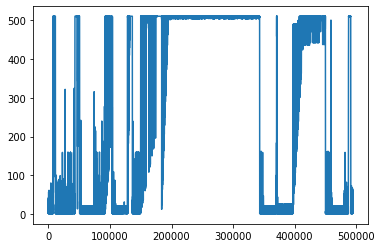

In [5]:
# Here's a quick plot of our time-series
import pandas as pd
pd.Series(intrusions['data'][:, 0]).plot()

In [6]:
# We'll load and run the SpectralResidual model that implements the method proposed by Microsoft:

from alibi_detect.od import SpectralResidual
od = SpectralResidual(threshold=1., window_amp=20, window_local=20,
                      n_est_points=10, n_grad_points=5)

In [7]:
# We can then get the anomaly scores for each point in our time-series:
scores = od.score(intrusions['data'][:, 0])

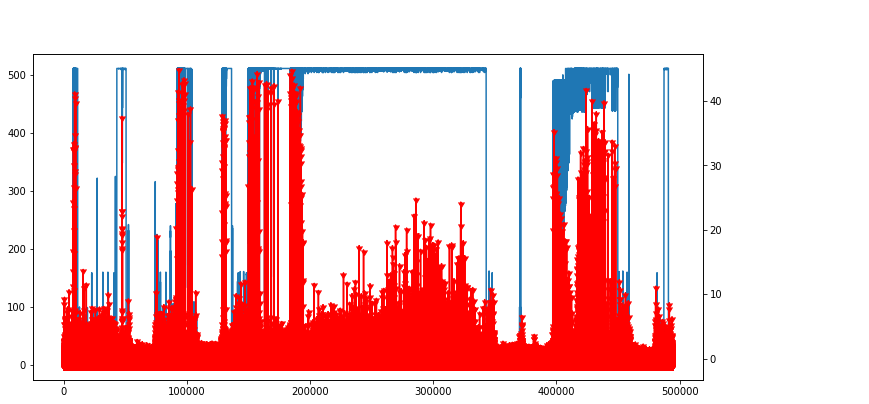

In [8]:
import matplotlib
ax = pd.Series(intrusions['data'][:, 0], name='data').plot(legend=False, figsize=(12, 6))
ax2 = ax.twinx()
ax = pd.Series(scores, name='scores').plot(ax=ax2, legend=False, color="r", marker=matplotlib.markers.CARETDOWNBASE)
ax.figure.legend(bbox_to_anchor=(1, 1), loc='upper left');

## Change point detection
We'll first create a synthetic multivariate time-series with the ruptures library. We'll set the number of dimensions to 3 and the length of the time-series to 500, and our time-series will have 3 change points and a Gaussian noise of standard deviation 5.0 will be over imposed

In [9]:
import numpy as np
import matplotlib.pylab as plt
import ruptures as rpt
signal, bkps = rpt.pw_constant(n_samples=500, n_features=3, n_bkps=3, 
                               noise_std=5.0, delta=(1, 20))

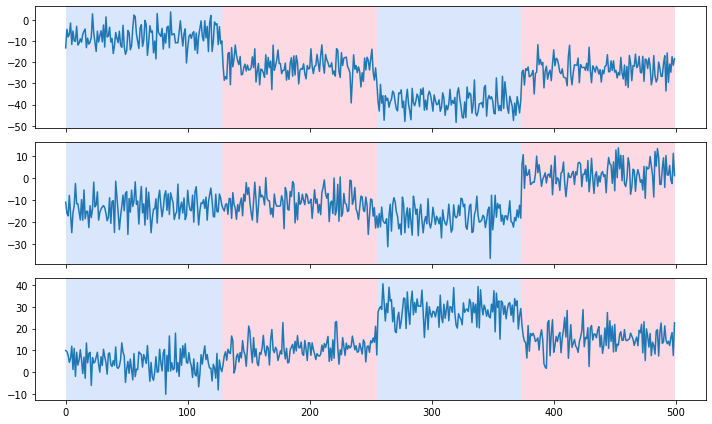

In [11]:
rpt.display(signal, bkps);

In [12]:
algo = rpt.Binseg(model="l1").fit(signal)
my_bkps = algo.predict(n_bkps=3)

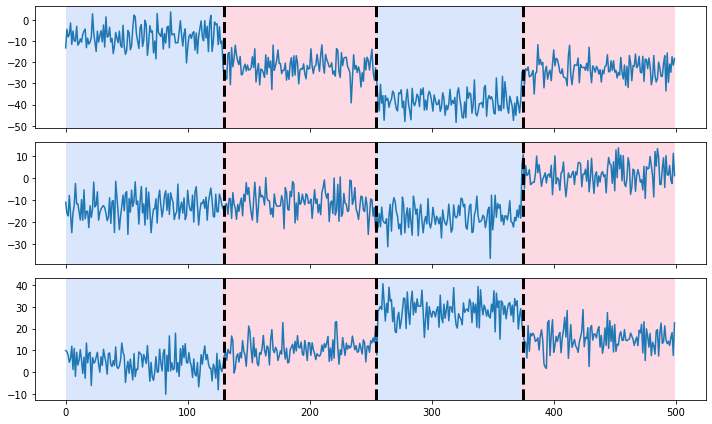

In [14]:
rpt.show.display(signal, bkps, my_bkps, figsize=(10, 6));